In [1]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import math

import matplotlib.pyplot as plt
import ast

from src.graph_ops import parse_ud_conllu
from src.utils import LANG_DICT, load_stats, format_xaxis_clean, format_pvalue

np.random.seed(42)

DEG_SEQ_FOLDER = "./data/degree_sequences"
DEP_NET_FOLDER = "./data/dependency_network"

In [5]:
lang_clustering = []
for lang in LANG_DICT.keys():     

    os.makedirs(DEG_SEQ_FOLDER, exist_ok=True)
    with open(
        f"{DEG_SEQ_FOLDER}/{LANG_DICT[lang]}_degree_sequence.txt",
        "w",
        encoding="utf-8",
    ) as f:
        nodes, edges = parse_ud_conllu(lang=lang)
        G = nx.Graph()
        new_edges = edges.copy()
        for edge_1, edge_2 in edges:
            if edge_1 == edge_2:
                new_edges.remove((edge_1, edge_2))
        G.add_nodes_from(nodes)
        G.add_edges_from(new_edges)

        out_degrees = [d for n, d in G.degree()]

        epsilon = math.sqrt(math.log(0.05/2) / (-2 * len(G.nodes()) * 0.2))
        ratio = len([d for d in out_degrees if d >= 2]) / len(out_degrees)
        product = epsilon * ratio

        lang_clustering.append((LANG_DICT[lang], nx.average_clustering(G), epsilon, ratio, product))

        for degree in out_degrees:
            f.write(f"{degree}\n")
    print(f"Saved degree sequence for {LANG_DICT[lang]}")

    os.makedirs(DEP_NET_FOLDER, exist_ok=True)
    with open(
        f"{DEP_NET_FOLDER}/{LANG_DICT[lang]}_dependency_network_edges.txt",
        "w",
        encoding="utf-8",
    ) as f:
        nodes, edges = parse_ud_conllu(lang=lang)
        G = nx.Graph()
        new_edges = edges.copy()
        for edge_1, edge_2 in edges:
            if edge_1 == edge_2:
                new_edges.remove((edge_1, edge_2))
        G.add_nodes_from(nodes)
        G.add_edges_from(new_edges)

        f.write(f"{len(G.nodes())} {len(G.edges())}\n")
        for edge in G.edges():
            f.write(f"{edge}\n")
    print(f"Saved dependency network (with edge list) for {LANG_DICT[lang]}")

    os.makedirs(DEP_NET_FOLDER, exist_ok=True)
    with open(
        f"{DEP_NET_FOLDER}/{LANG_DICT[lang]}_dependency_network_adj.txt",
        "w",
        encoding="utf-8",
    ) as f:
        nodes, edges = parse_ud_conllu(lang=lang)
        G = nx.Graph()
        new_edges = edges.copy()
        for edge_1, edge_2 in edges:
            if edge_1 == edge_2:
                new_edges.remove((edge_1, edge_2))
        G.add_nodes_from(nodes)
        G.add_edges_from(new_edges)

        f.write(f"{len(G.nodes())} {len(G.edges())}\n")
        for node in G.nodes():
            f.write(f"{[str(node)], list(G.neighbors(node))}\n")
    print(f"Saved dependency network (with adjacency list) for {LANG_DICT[lang]}")

clustering_dataset = pd.DataFrame(lang_clustering, columns=["Language", "Clustering", "ε_Hoeffding", "Fraction_nodes_deg≥2", "ε_Hoeffding * Fraction_nodes_deg≥2"])
output_path = "./data/clustering_dataset.csv"
clustering_dataset.to_csv(output_path)    

Saved degree sequence for english
Saved dependency network (with edge list) for english
Saved dependency network (with adjacency list) for english
Saved degree sequence for arabic
Saved dependency network (with edge list) for arabic
Saved dependency network (with adjacency list) for arabic
Saved degree sequence for czech
Saved dependency network (with edge list) for czech
Saved dependency network (with adjacency list) for czech
Saved degree sequence for german
Saved dependency network (with edge list) for german
Saved dependency network (with adjacency list) for german
Saved degree sequence for spanish
Saved dependency network (with edge list) for spanish
Saved dependency network (with adjacency list) for spanish
Saved degree sequence for finnish
Saved dependency network (with edge list) for finnish
Saved dependency network (with adjacency list) for finnish
Saved degree sequence for french
Saved dependency network (with edge list) for french
Saved dependency network (with adjacency lis

In [4]:
def language_stats(language):
    N = language[0]
    E = language[1]
    delta = 2 * E / (N * (N - 1))
    
    return pd.Series(
        {
            "N": N,
            "E": E,
            "<k>": 2 * E / N,
            "δ": delta
        }
    )

stats_list = []
for lang in LANG_DICT.keys():
    degrees = load_stats(f"{DEP_NET_FOLDER}", lang)
    stats = language_stats(degrees)
    stats.name = LANG_DICT[lang]
    stats_list.append(stats)

language_dataset = pd.DataFrame(stats_list)
language_dataset.index.name = "Language"

output_path = "./data/language_stats.csv"
language_dataset.to_csv(output_path)

print(language_dataset)

                 N        E       <k>         δ
Language                                       
english     4665.0  16908.0  7.248875  0.001554
arabic      4785.0  16251.0  6.792476  0.001420
czech       5318.0  14984.0  5.635201  0.001060
german      5385.0  17316.0  6.431198  0.001195
spanish     4528.0  17396.0  7.683746  0.001697
finnish     4953.0  12733.0  5.141530  0.001038
french      4632.0  18186.0  7.852332  0.001696
galician    4476.0  17438.0  7.791778  0.001741
hindi       4420.0  15319.0  6.931674  0.001569
indonesian  3726.0  14961.0  8.030596  0.002156
icelandic   4837.0  14786.0  6.113707  0.001264
italian     4814.0  18072.0  7.508101  0.001560
japanese    4906.0  19901.0  8.112923  0.001654
korean      6371.0  13679.0  4.294145  0.000674
polish      5033.0  14840.0  5.897079  0.001172
portuguese  5109.0  18128.0  7.096496  0.001389
russian     5155.0  15432.0  5.987197  0.001162
swedish     5006.0  15676.0  6.262885  0.001251
thai        4043.0  15988.0  7.908978  0

In [7]:
print(pd.read_csv("./data/clustering_dataset.csv")[["Language", "Clustering", "ε_Hoeffding", "Fraction_nodes_deg≥2", "ε_Hoeffding * Fraction_nodes_deg≥2"]])

      Language  Clustering  ε_Hoeffding  Fraction_nodes_deg≥2  \
0      english    0.089266     0.044462              0.781994   
1       arabic    0.074936     0.043901              0.771996   
2        czech    0.052639     0.041643              0.743137   
3       german    0.134783     0.041383              0.821356   
4      spanish    0.169526     0.045130              0.824205   
5      finnish    0.054961     0.043150              0.686049   
6       french    0.178722     0.044620              0.813687   
7     galician    0.183875     0.045391              0.824620   
8        hindi    0.183477     0.045678              0.759729   
9   indonesian    0.089454     0.049750              0.742083   
10   icelandic    0.083570     0.043665              0.770312   
11     italian    0.137976     0.043769              0.809098   
12    japanese    0.140490     0.043356              0.777008   
13      korean    0.029303     0.038046              0.732538   
14      polish    0.05353

In [ ]:
! python -m src.montecarlo_full

In [ ]:
df = pd.read_csv("./data/p_values_dataset.csv")

if 'P-value_ER' in df.columns:
    df['P-value_ER'] = df['P-value_ER'].apply(format_pvalue)

if 'P-value_SW' in df.columns:
    df['P-value_SW'] = df['P-value_SW'].apply(format_pvalue)

df.to_csv("./data/p_values_dataset.csv", index=False)

In [2]:
print(pd.read_csv("./data/p_values_dataset.csv"))

      Language P-value_ER       P-value_SW  Mean_Effective_Switches_SW  \
0      english     <10^-4         >1-10^-4                    0.802022   
1       arabic     <10^-4  0.9977 ± 0.0005                    0.839644   
2        czech     <10^-4         >1-10^-4                    0.865423   
3       german     <10^-4  0.9921 ± 0.0009                    0.770805   
4      spanish     <10^-4  0.9999 ± 0.0001                    0.720367   
5      finnish     <10^-4  0.9989 ± 0.0003                    0.858475   
6       french     <10^-4  0.9943 ± 0.0008                    0.711013   
7     galician     <10^-4  0.6903 ± 0.0046                    0.716507   
8        hindi     <10^-4         >1-10^-4                    0.684326   
9   indonesian     <10^-4  0.0139 ± 0.0012                    0.825995   
10   icelandic     <10^-4         >1-10^-4                    0.812219   
11     italian     <10^-4         >1-10^-4                    0.731076   
12    japanese     <10^-4         >1-1

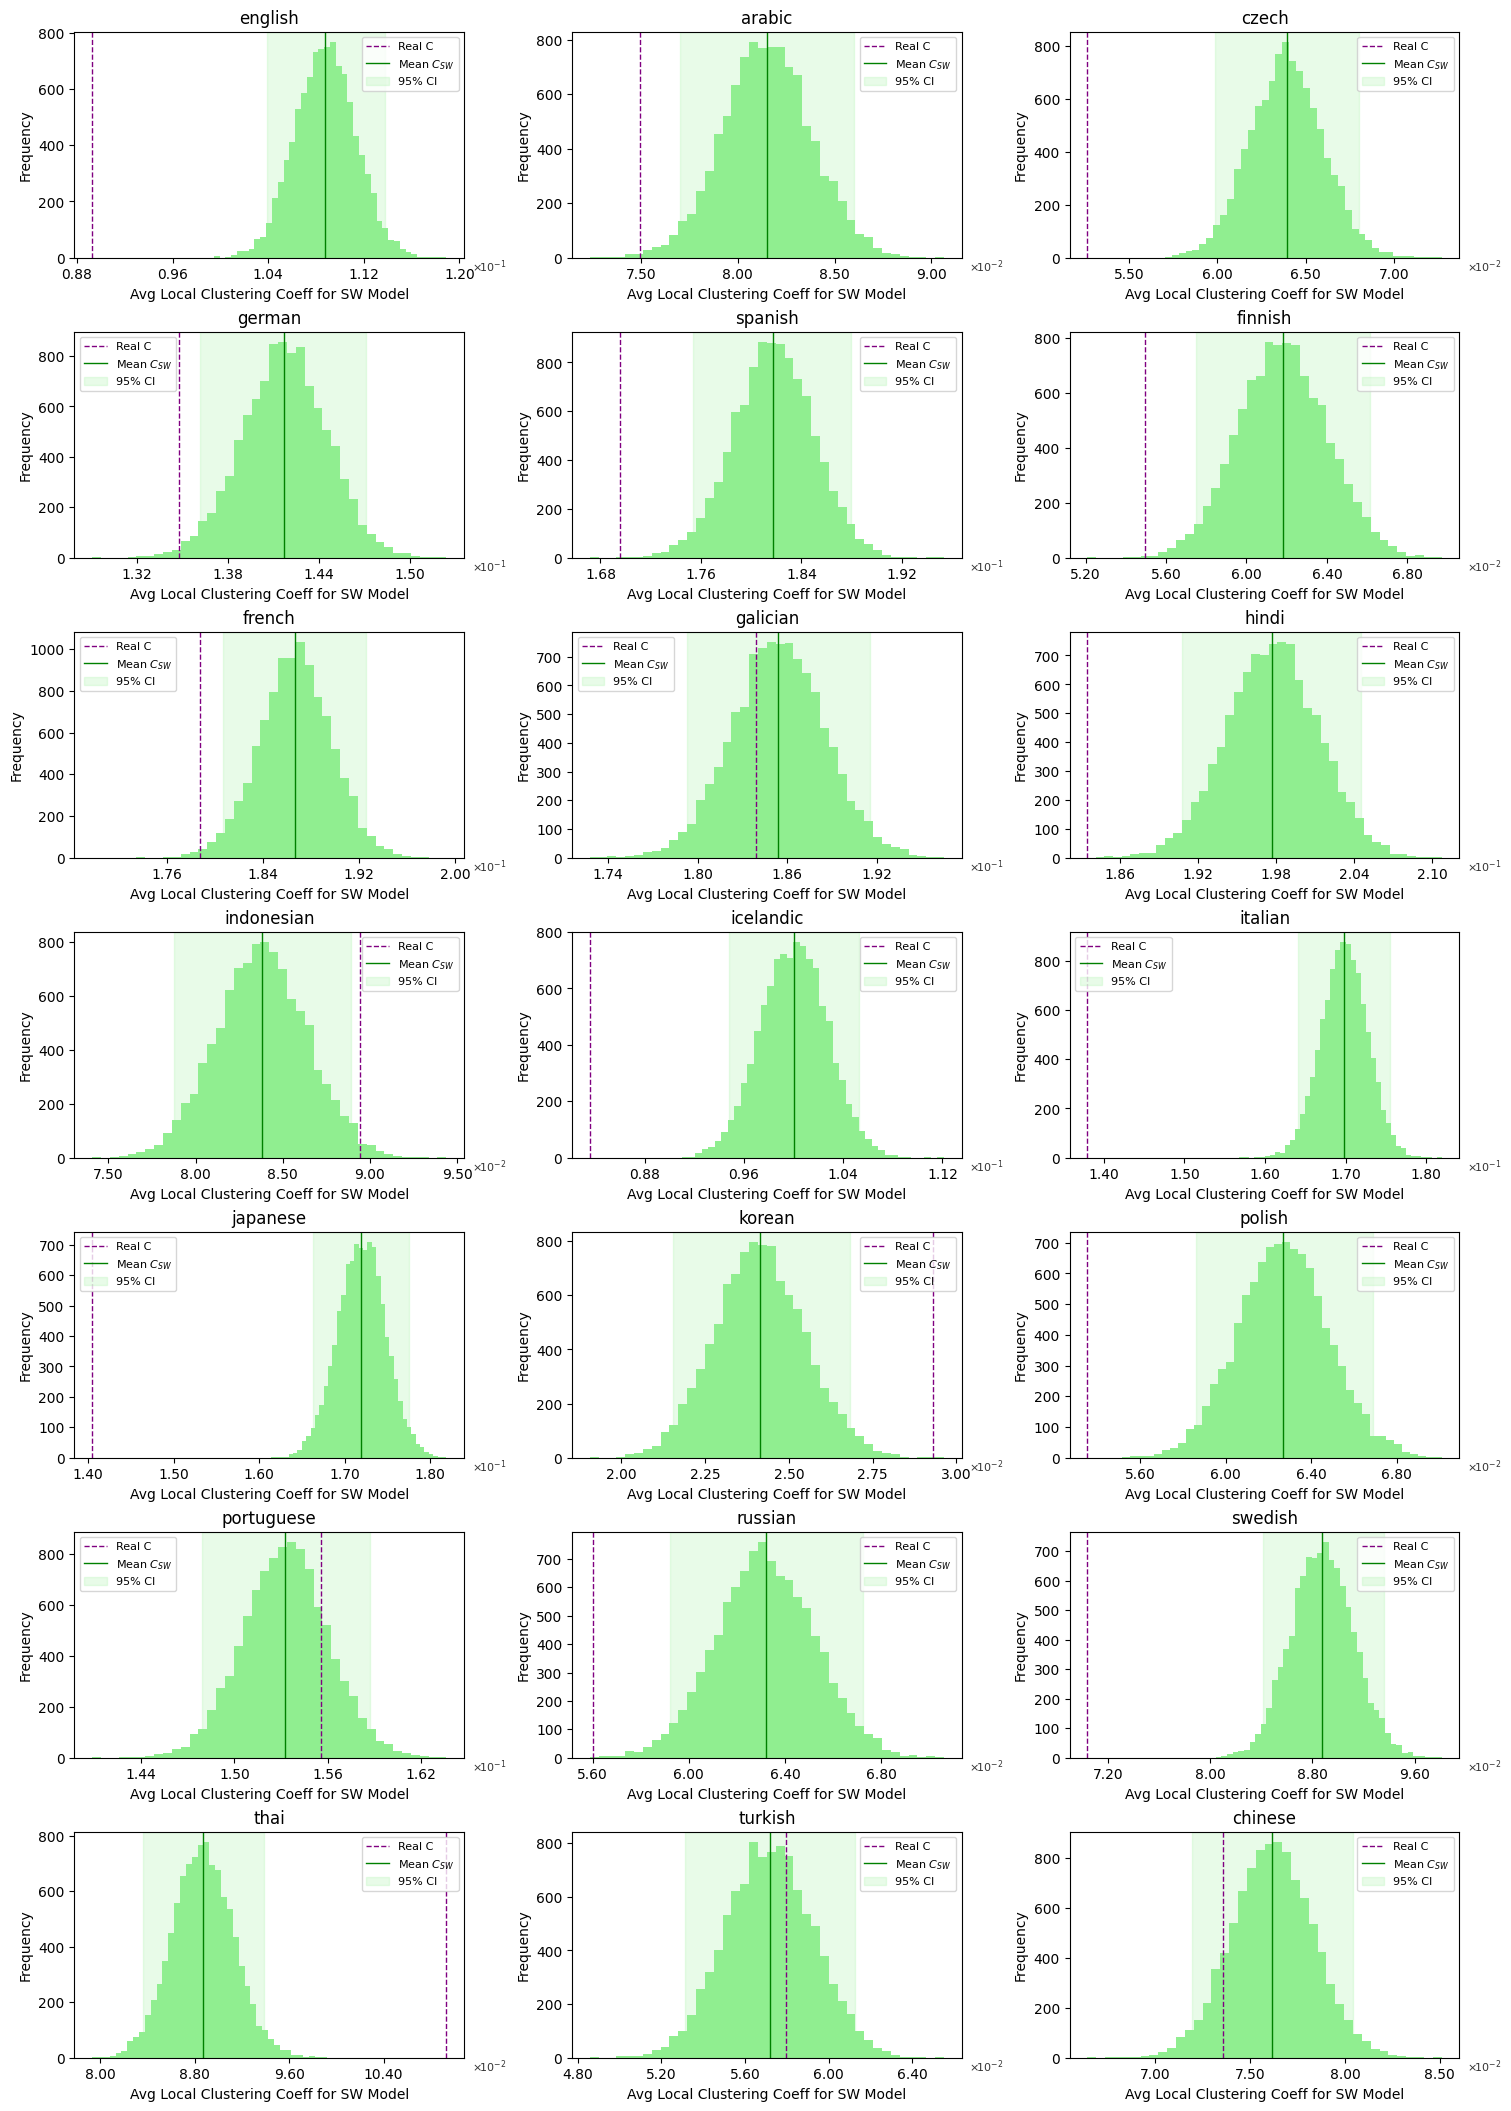

In [14]:
os.makedirs("./images", exist_ok=True)
df = pd.read_csv("./data/p_values_dataset.csv")
df['C_SW_Simulations'] = df['C_SW_Simulations'].apply(ast.literal_eval)

real_values_dict = pd.read_csv("./data/clustering_dataset.csv", index_col="Language")["Clustering"].to_dict()

n_cols = 3
n_rows = (len(df) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*3), constrained_layout=True)
axes = axes.flatten()

for i, (_, row) in enumerate(df.iterrows()):
    lang = row['Language']
    ax = axes[i]
    sim_values = row['C_SW_Simulations']
    
    ax.hist(sim_values, bins=40, color='lightgreen')
    
    if lang in real_values_dict:
        ax.axvline(real_values_dict[lang], color='purple', linestyle='--', linewidth=1, label="Real C")
    
    mean_sim = np.mean(sim_values)
    ax.axvline(mean_sim, color='green', linestyle='-', linewidth=1, label="Mean $C_{SW}$")
    
    ci_lower, ci_upper = np.percentile(sim_values, [2.5, 97.5])
    ax.axvspan(ci_lower, ci_upper, color="lightgreen", alpha=0.2, zorder=0, label="95% CI")
    
    format_xaxis_clean(ax, sim_values)

    ax.set_title(lang)
    ax.set_xlabel("Avg Local Clustering Coeff for SW Model")
    ax.set_ylabel("Frequency")
    ax.legend(fontsize=8)

for j in range(len(df), len(axes)):
    axes[j].axis('off')
    
plt.savefig("./images/SW_model_clustering_histograms_ci.png", dpi=300)

plt.show()


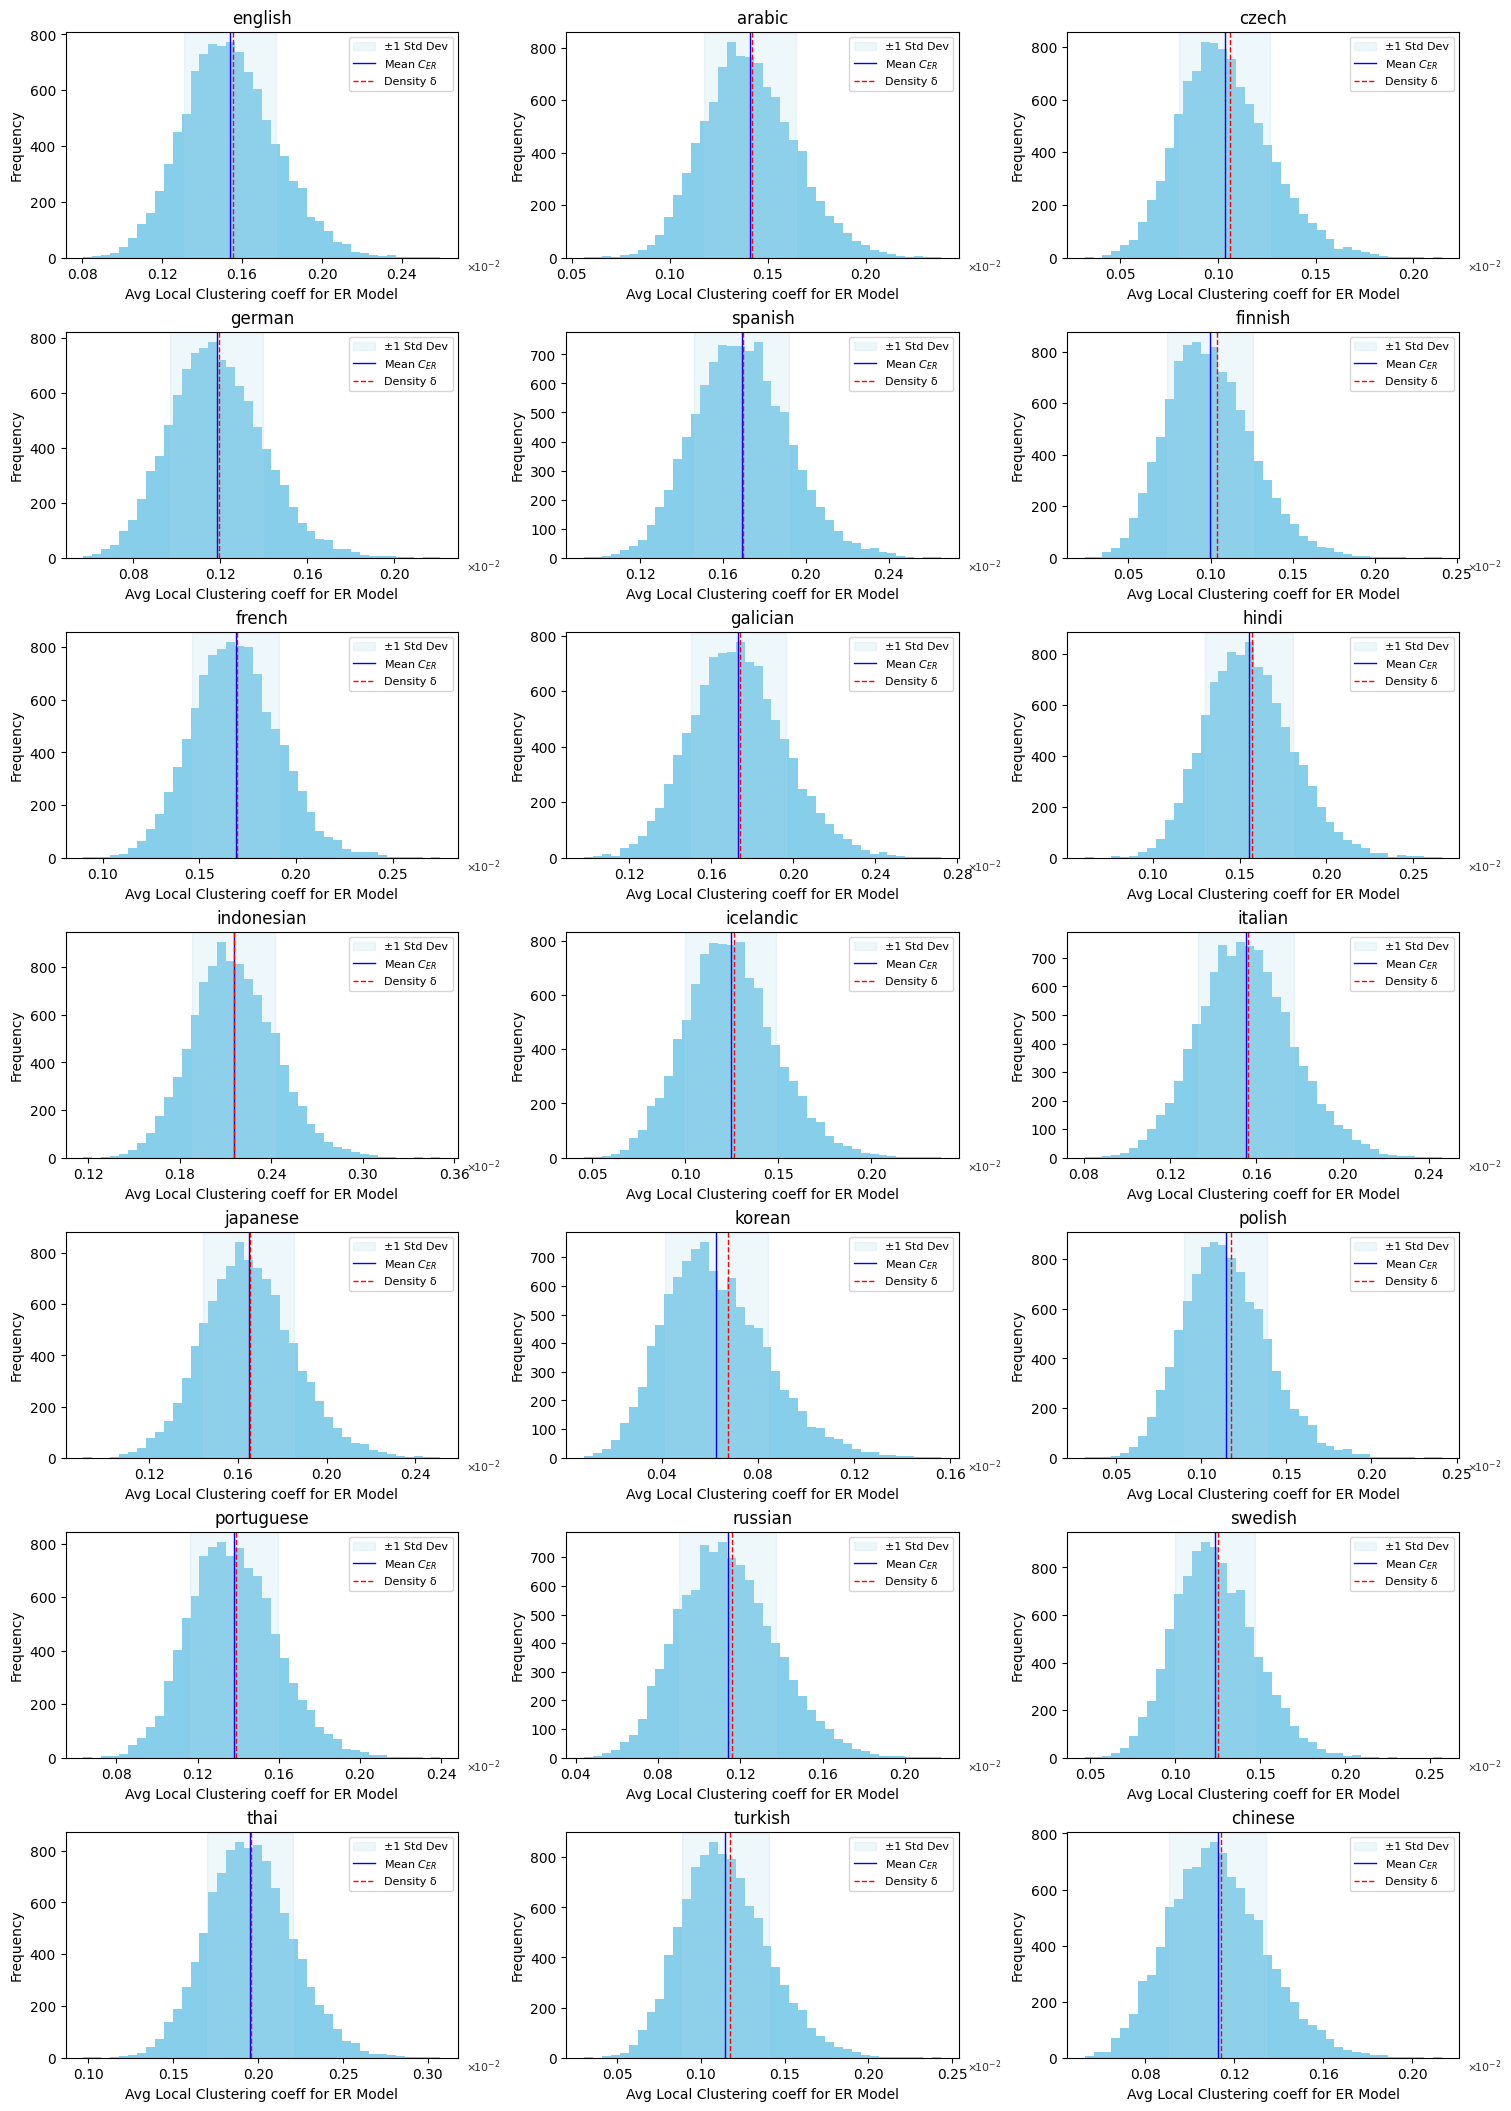

In [15]:
os.makedirs("./images", exist_ok=True)
df = pd.read_csv("./data/p_values_dataset.csv")
df['C_ER_Simulations'] = df['C_ER_Simulations'].apply(ast.literal_eval)

df_stats = pd.read_csv("./data/language_stats.csv")
density_dict = dict(zip(df_stats['Language'], df_stats['δ']))

n_cols = 3
n_rows = (len(df) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*3), constrained_layout=True)
axes = axes.flatten()

for i, (_, row) in enumerate(df.iterrows()):
    lang = row['Language']
    ax = axes[i]
    ax.hist(row['C_ER_Simulations'], bins=40, color='skyblue')

    mean_sim = np.mean(row['C_ER_Simulations'])
    std_sim = np.std(row['C_ER_Simulations'])
    
    ax.axvspan(mean_sim - std_sim, mean_sim + std_sim, 
               color='lightblue', alpha=0.2, label='±1 Std Dev')
    
    ax.axvline(mean_sim, color='blue', linestyle='-', linewidth=1, label='Mean $C_{ER}$')
    
    if lang in density_dict:
        ax.axvline(density_dict[lang], color='red', linestyle='--', linewidth=1, label='Density δ')

    
    format_xaxis_clean(ax, sim_values)

    ax.set_title(lang)
    ax.set_xlabel("Avg Local Clustering coeff for ER Model")
    ax.set_ylabel("Frequency")

    ax.legend(fontsize=8)

for j in range(len(df), len(axes)):
    axes[j].axis('off')

plt.savefig("./images/ER_model_clustering_histograms_std.png", dpi=300)
plt.show()
